In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import umap
!pip install umap-learn[plot]
import umap.plot

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
from re import S
## for incident
# raw = pd.read_csv("/content/MOGDatabase-IncidentCriteriaCoho_DATA_2025-04-02_1550.csv")
# raw_relapse = pd.DataFrame()


# raw_relapse['ON'] = raw.iloc[:, 11:15].sum(axis=1)
# raw_relapse['myelitis'] = raw.iloc[:, 16:19].sum(axis=1)
# raw_relapse['brain'] = raw.iloc[:, 20:24].sum(axis=1)
# rows_to_drop = (raw_relapse.iloc[:, -3:] == 0).all(axis=1)
# raw_relapse = raw_relapse[~rows_to_drop]
# raw_relapse.head()

# for all - severity scores
# sraw = pd.read_csv("/MOGDatabase-ClinicalAttacks_DATA_2025-04-02_1544.csv")
# sraw_relapse = pd.DataFrame()
# sraw_relapse['record_id'] = sraw.iloc[:, 0]

# sraw_relapse['ON'] = sraw.iloc[:, 14:19].sum(axis=1)
# sraw_relapse['myelitis'] = sraw.iloc[:, 19:23].sum(axis=1)
# sraw_relapse['brain'] = sraw.iloc[:, 23:28].sum(axis=1)
# srows_to_drop = (sraw_relapse.iloc[:, -3:] == 0).all(axis=1)
# sraw_relapse = sraw_relapse[~srows_to_drop]


## incident with all
# raw = pd.read_csv("/content/MOGDatabase-IncidentCriteriaCoho_DATA_2025-04-02_1550.csv")

# raw_relapse = raw.iloc[:, 11:24]
# raw_relapse.insert(0, 'record_id', raw.iloc[:,0])
# cleaned = raw_relapse.dropna()
# cleaned.head()

## all with all
raw = pd.read_csv("/content/MOGDatabase-ClinicalAttacks_DATA_2025-04-02_1544.csv")
raw_relapse = raw.iloc[:, 14:28]
raw_relapse.insert(0, 'record_id', raw.iloc[:,0])
cleaned = raw_relapse.dropna()
cleaned.head()
#sraw_relapse.head()

,record_id,on_supporting_criteria___1,on_supporting_criteria___2,on_supporting_criteria___3,on_supporting_criteria___4,on_supporting_criteria___5,myelitis_supporting_criter___1,myelitis_supporting_criter___2,myelitis_supporting_criter___3,myelitis_supporting_criter___4,brain_supporting_criteria___1,brain_supporting_criteria___2,brain_supporting_criteria___3,brain_supporting_criteria___4,brain_supporting_criteria___5
1,12,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,14,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cleaned.record_id.value_counts()
#sraw_relapse.record_id.value_counts()

,count
record_id,
165,32
267,30
101,20
17,16
49,14
...,...
14,1
32,1
33,1


In [ ]:
#sns.pairplot(raw_relapse, hue='record_id');

In [ ]:
cleaned = cleaned[~(cleaned.iloc[:, 1:] == 0).all(axis=1)]
cleaned.record_id.value_counts()

,count
record_id,
267,17
165,14
17,14
101,13
49,12
...,...
290,1
293,1
294,1


In [ ]:
raw_relapse = cleaned
reducer = umap.UMAP(n_neighbors=50, min_dist=0.2, metric='euclidean', random_state=42)
mapper = reducer.fit(raw_relapse.iloc[:, 1:].values)
embedding = reducer.transform(raw_relapse.iloc[:, 1:].values)

assert(np.all(embedding == reducer.embedding_))
embedding.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



(590, 2)

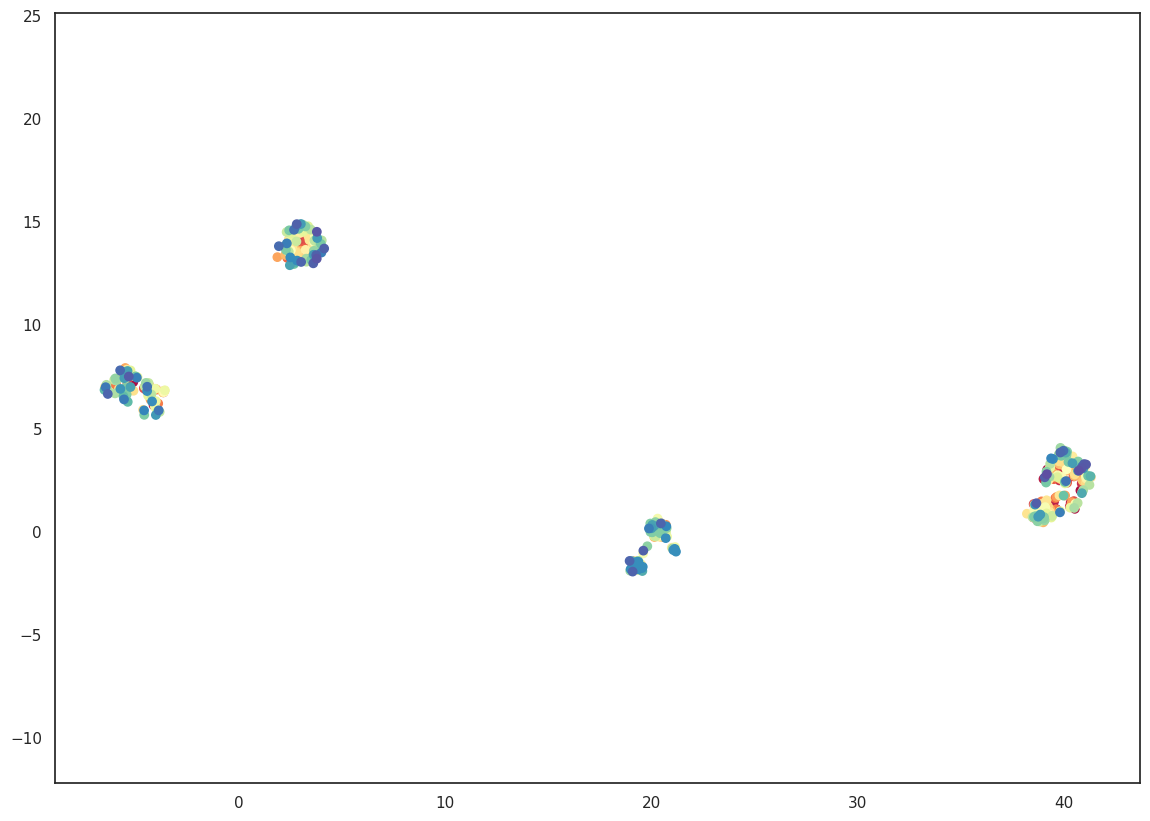

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c = raw_relapse.record_id, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#plt.title('UMAP projection of the complete dataset based on all criteria', fontsize=24);

In [ ]:
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df['attack_id'] = cleaned.index.tolist()
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2',
                 hover_data=['attack_id'],
                 title='UMAP Plot with Attack IDs on Hover',
                 labels={'UMAP1': 'UMAP Dimension 1', 'UMAP2': 'UMAP Dimension 2'})
fig.show()

In [ ]:
## all all w/ 50 neighbors, min dist = 0.2, removed 0s. clusters numbered left to right
# cluster1 = raw_relapse.loc[[1076,507,1049,41,1056,1023,990,683,787]] #first 5 from left, last 4 from right
# print(cluster1)
# cluster2 = raw_relapse.loc[[209,541,146,710,155,580]]
# print(cluster2)
# cluster3 = raw_relapse.loc[[1082,929,858,751,898, 826,1083,1031,586,1085]] #first 5 from top, last 5 from bottom left cluster
# print(cluster3)
cluster4 = raw_relapse.loc[[456,908,1078,835,885,979,647,849,61,612]] #first 5 from top, last 5 from bottom left cluster
print(cluster4)

## all all w/ 15 neighbors, min dist = 0.1
# cluster1 = raw_relapse.loc[[1074, 1111, 1054, 734, 736]]
# print(cluster1)
# cluster2 = raw_relapse.loc[[995, 970, 950, 694, 1033, 865]]
# print(cluster2)
# cluster3 = raw_relapse.loc[[1033, 950, 839, 1118, 599]]
# print(cluster3)
# cluster4 = raw_relapse.loc[[282, 320,53, 643,1121]]
# print(cluster4)
# cluster5 = raw_relapse.loc[[966, 357,1105, 976, 1049]]
# print(cluster5)
# cluster6 = raw_relapse.loc[[990, 543, 904, 842, 269, 1004]]
# print(cluster6)
# cluster7 = raw_relapse.loc[[1082, 981,1040, 615]]
# print(cluster7)
# cluster8 = raw_relapse.loc[[1085, 959, 1030, 850, 810]]
# print(cluster8)

## incident
# cluster1 = raw_relapse.loc[[503, 438, 329, 106, 550, 776]]
# print(cluster1)
# cluster2 = raw_relapse.loc[[964, 446, 229, 14, 1153, 1131, 65]]
# print(cluster2)
# cluster3 = raw_relapse.loc[[85, 565, 585, 267, 656, 582, 308, 192]]
# print(cluster3)
# cluster4 = raw_relapse.loc[[517, 899, 205, 52, 1180, 900]]
# print(cluster4)
# cluster5 = raw_relapse.loc[[262, 726, 528, 1030, 1009, 29, 420]]
# print(cluster5)

## all
# cluster1 = raw_relapse.loc[[306, 394, 97, 1, 78]]
# print(cluster1)
# cluster2 = raw_relapse.loc[[687, 165, 939, 941, 853]]
# print(cluster2)
# cluster3 = raw_relapse.loc[[972, 289, 8, 262, 249]]
# print(cluster3)
# cluster4 = raw_relapse.loc[[715, 962, 98, 871, 236]]
# print(cluster4)
# cluster5 = raw_relapse.loc[[549, 360, 4, 317, 43]]
# print(cluster5)
# cluster6 = raw_relapse.loc[[241, 273, 997, 443, 612]]
# print(cluster6)

## incident with all criteria
# cluster1 = raw_relapse.loc[[1164, 806, 1004, 1070, 1010]] #ON criteria 5
# print(cluster1)
# cluster2 = raw_relapse.loc[[1049, 964, 988, 781, 1049]] #myelitis 1 and 3 with some ON
# print(cluster2)
# cluster3 = raw_relapse.loc[[772, 1135, 868]] #brain 1, 2, and 4
# print(cluster3)
# cluster4 = raw_relapse.loc[[1086, 894, 765, 1175, 1165, 1011, 1021, 1167]] #myelitis 2 and brain 1, lots of 0s?
# print(cluster4)
# cluster5 = raw_relapse.loc[[1180, 43, 486, 874, 727]] #ON 3, 4
# print(cluster5)
# cluster6 = raw_relapse.loc[[946, 1166, 268, 322]] #myelitis 4
# print(cluster6)

      record_id  on_supporting_criteria___1  on_supporting_criteria___2  \
456         127                         0.0                         0.0   
908         233                         0.0                         1.0   
1078        286                         0.0                         0.0   
835         218                         0.0                         0.0   
885         229                         0.0                         0.0   
979         260                         1.0                         0.0   
647         166                         1.0                         0.0   
849         221                         1.0                         0.0   
61           27                         1.0                         0.0   
612         165                         1.0                         0.0   

      on_supporting_criteria___3  on_supporting_criteria___4  \
456                          0.0                         1.0   
908                          0.0              

In [ ]:
supporting_criteria = cleaned[cleaned["myelitis_supporting_criter___2"] != 0]

# Calculate the percentage of those that have criteria #2
supporting_criteria['brain sum'] = supporting_criteria.iloc[:, 10:15].sum(axis=1)
supporting_criteria.head()
percent_relapse = (supporting_criteria["brain sum"] >= 1).mean() * 100

print(f"{percent_relapse:.2f}% of patients with myelitis 2 have brain involvement.")


brain_sum = cleaned.copy()
brain_sum['brain sum'] = cleaned.iloc[:, 10:15].sum(axis=1)
supporting_criteria = brain_sum[brain_sum["brain sum"] != 0]

percent_relapse = (supporting_criteria["myelitis_supporting_criter___2"] >= 1).mean() * 100

print(f"{percent_relapse:.2f}% of patients with brain involvement have myelitis 2.")

25.00% of patients with myelitis 2 have brain involvement.
7.63% of patients with brain involvement have myelitis 2.


<ipython-input-79-9668183a5c3d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

